# Importing Libralies

In [50]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Reading Dataset and Initial Observations

In [51]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science Projects & Resources/Student Stress Level/Dataset.csv")

In [52]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1


In [16]:
df.columns = [col.replace("_", " ").title() for col in df.columns]

In [17]:
df.head()

,Anxiety Level,Self Esteem,Mental Health History,Depression,Headache,Blood Pressure,Sleep Quality,Breathing Problem,Noise Level,Living Conditions,Safety,Basic Needs,Academic Performance,Study Load,Teacher Student Relationship,Future Career Concerns,Social Support,Peer Pressure,Extracurricular Activities,Bullying,Stress Level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Anxiety Level                 1100 non-null   int64
 1   Self Esteem                   1100 non-null   int64
 2   Mental Health History         1100 non-null   int64
 3   Depression                    1100 non-null   int64
 4   Headache                      1100 non-null   int64
 5   Blood Pressure                1100 non-null   int64
 6   Sleep Quality                 1100 non-null   int64
 7   Breathing Problem             1100 non-null   int64
 8   Noise Level                   1100 non-null   int64
 9   Living Conditions             1100 non-null   int64
 10  Safety                        1100 non-null   int64
 11  Basic Needs                   1100 non-null   int64
 12  Academic Performance          1100 non-null   int64
 13  Study Load                    110

In [19]:
df.duplicated().sum()

np.int64(0)

## Dataset Overview

- **Entries:** 1,100 rows  
- **Columns:** 21 features (all numeric, int64)  
- **No missing values** – all columns have 1,100 non-null entries.  
- **Memory usage:** ~180.6 KB  
- **Duplicate entries:** None reported.  

# Statistical Analysis with Its Visualizations

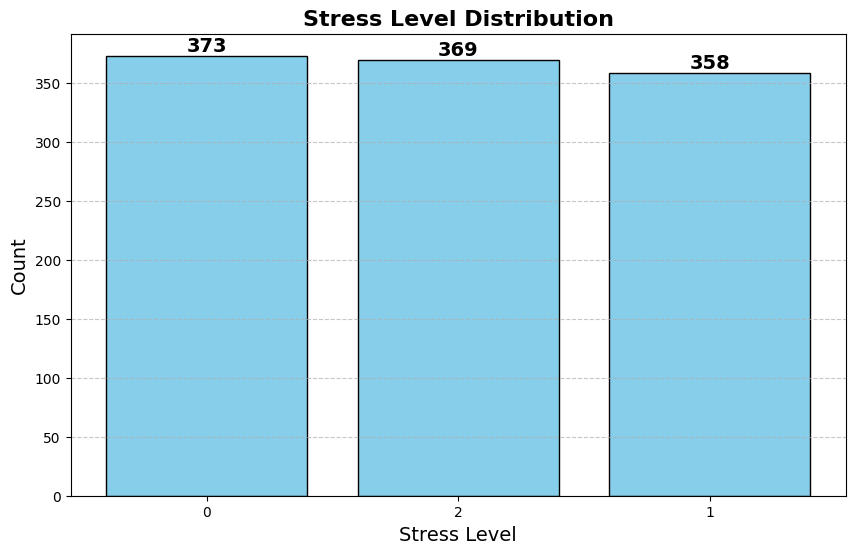

In [20]:
counts = df["Stress Level"].value_counts()

plt.figure(figsize=(10,6))
bars = plt.bar(counts.index.astype(str), counts.values, color="skyblue", edgecolor="black")


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(yval),
             ha='center', va='bottom', fontsize=14, fontweight="bold")

plt.title("Stress Level Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Stress Level", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## Stress Level Distribution Observation

- There are three distinct stress levels, labeled as 0, 2, and 1.
- The number of samples in each category is as follows:
  - **Stress Level 0:** 373 samples
  - **Stress Level 2:** 369 samples
  - **Stress Level 1:** 358 samples
- The distribution is fairly balanced, with no category significantly larger or smaller than the others.
- This suggests that all stress levels are similarly represented in the dataset.


In [21]:
df.describe()

,Anxiety Level,Self Esteem,Mental Health History,Depression,Headache,Blood Pressure,Sleep Quality,Breathing Problem,Noise Level,Living Conditions,Safety,Basic Needs,Academic Performance,Study Load,Teacher Student Relationship,Future Career Concerns,Social Support,Peer Pressure,Extracurricular Activities,Bullying,Stress Level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,2.737273,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,1.406171,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [22]:
df[["Anxiety Level","Self Esteem","Depression"]].describe().iloc[3:].T

,min,25%,50%,75%,max
Anxiety Level,0.0,6.0,11.0,16.0,21.0
Self Esteem,0.0,11.0,19.0,26.0,30.0
Depression,0.0,6.0,12.0,19.0,27.0


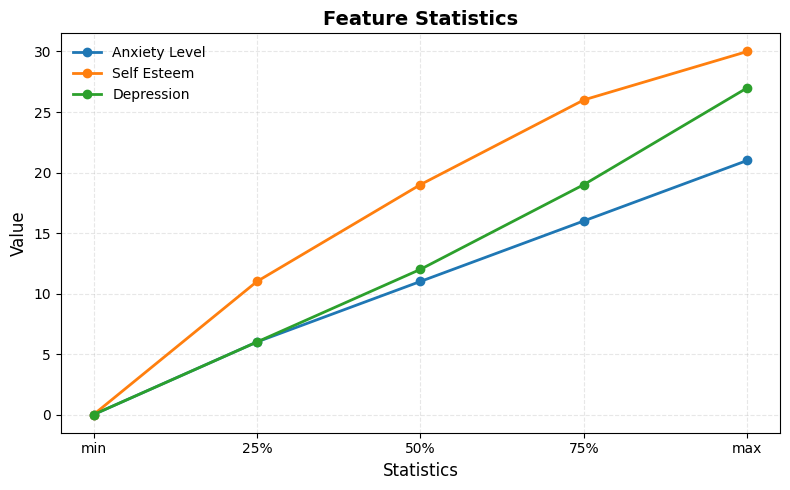

In [23]:
stats = df[["Anxiety Level","Self Esteem","Depression"]].describe().iloc[3:].T

plt.figure(figsize=(8,5))
for col in stats.index:
    plt.plot(stats.columns, stats.loc[col], marker="o", linewidth=2, markersize=6, label=col)


plt.title("Feature Statistics", fontsize=14, fontweight="bold")
plt.xlabel("Statistics", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Observations

- **Anxiety Level:** The median (50th percentile) is 11.0, indicating half of the participants have an anxiety score of 11 or less. The distribution extends up to a maximum of 21.0, with the middle 50% falling between 6.0 and 16.0.
- **Self Esteem:** The scores range from 0.0 to 30.0, with a median of 19.0. This indicates a relatively higher variability and central tendency compared to anxiety and depression.
- **Depression:** The depression scores have a median of 12.0, and the upper quartile (75%) is 19.0, with scores reaching up to 27.0. Like anxiety, the distribution is moderately spread out with a similar interquartile range.

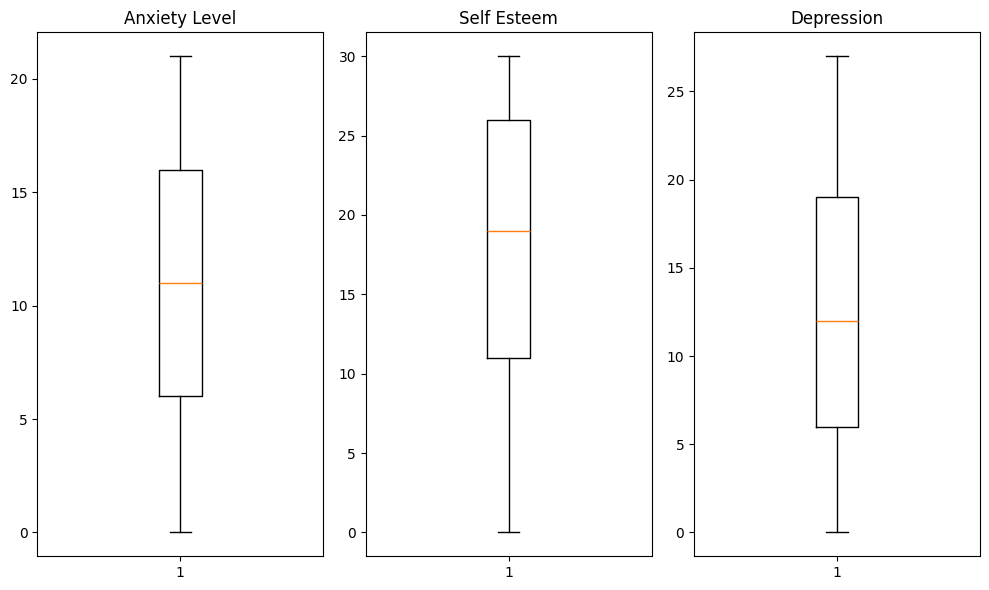

In [24]:
features = ["Anxiety Level", "Self Esteem", "Depression"]

plt.figure(figsize=(10,6))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Outlier Analysis Summary

- **No potential outliers were identified** in the data for Anxiety Level, Self Esteem, or Depression.
- While certain extreme values exist, they cannot collectively be termed as outliers because psychological measures can differ greatly among individuals.
- Therefore, **no data capping or exclusion is appropriate in this context**, and it is concluded that **no outliers were found**.


In [25]:

df[["Anxiety Level","Self Esteem","Depression"]].describe().iloc[1:-1:4,].T.rename(columns={"mean":"Mean","50%":"Median"})

,Mean,Median
Anxiety Level,11.063636,11.0
Self Esteem,17.777273,19.0
Depression,12.555455,12.0


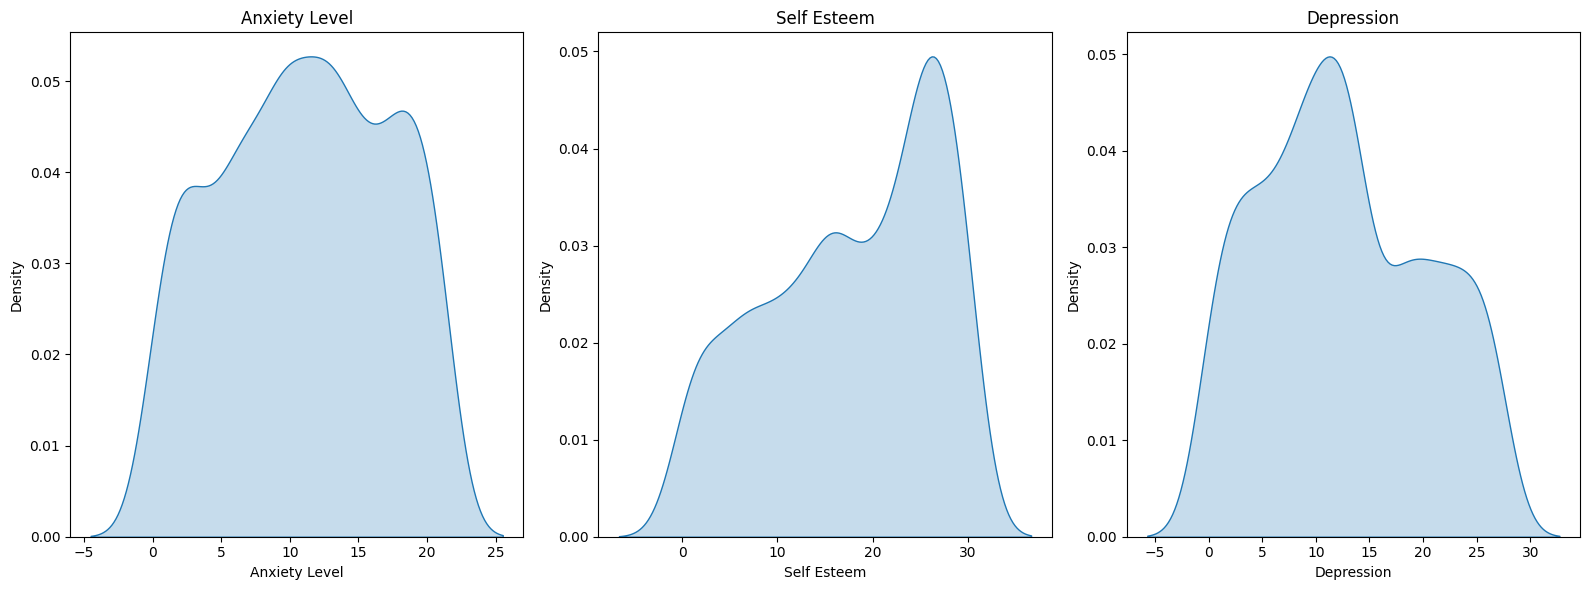

In [26]:
features = ["Anxiety Level", "Self Esteem", "Depression"]

plt.figure(figsize=(16,6))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)   # 1 row, 3 columns
    sns.kdeplot(df[col], fill=True)
    plt.title(col)

plt.tight_layout()
plt.show()

### Observations

- **Anxiety Level:** The mean (11.06) and median (11.0) are very close, indicating a roughly symmetric distribution.
- **Self Esteem:** The mean (17.78) is slightly less than the median (19.0), which may suggest a left-skewed distribution with a few lower values.
- **Depression:** The mean (12.56) and median (12.0) are again quite similar, supporting that the depression scores are nearly symmetrically distributed.

In [27]:
df.corr()

,Anxiety Level,Self Esteem,Mental Health History,Depression,Headache,Blood Pressure,Sleep Quality,Breathing Problem,Noise Level,Living Conditions,Safety,Basic Needs,Academic Performance,Study Load,Teacher Student Relationship,Future Career Concerns,Social Support,Peer Pressure,Extracurricular Activities,Bullying,Stress Level
Anxiety Level,1.000000,-0.672745,0.634450,0.694340,0.632738,0.330867,-0.710292,0.561654,0.608624,-0.568434,-0.651220,-0.637079,-0.649601,0.586064,-0.663176,0.717016,-0.569748,0.642910,0.641022,0.709982,0.736795
Self Esteem,-0.672745,1.000000,-0.603502,-0.699602,-0.626058,-0.514692,0.662693,-0.510514,-0.571169,0.550535,0.643981,0.631212,0.639045,-0.575112,0.652934,-0.712520,0.679211,-0.607118,-0.641202,-0.640737,-0.756195
Mental Health History,0.634450,-0.603502,1.000000,0.615882,0.604826,0.295617,-0.614146,0.464347,0.515290,-0.508525,-0.546731,-0.601196,-0.586193,0.532267,-0.587728,0.625909,-0.482560,0.580602,0.554576,0.624366,0.648644
Depression,0.694340,-0.699602,0.615882,1.000000,0.657700,0.436084,-0.693161,0.522540,0.566250,-0.530351,-0.625857,-0.608776,-0.633174,0.602498,-0.673853,0.706561,-0.617972,0.635544,0.648551,0.665790,0.734379
Headache,0.632738,-0.626058,0.604826,0.657700,1.000000,0.361986,-0.638771,0.461719,0.543557,-0.532825,-0.589136,-0.623199,-0.622059,0.542890,-0.625928,0.679307,-0.572988,0.622581,0.582562,0.609775,0.713484
Blood Pressure,0.330867,-0.514692,0.295617,0.436084,0.361986,1.000000,-0.300323,0.162308,0.352744,-0.274686,-0.288354,-0.280590,-0.262785,0.348964,-0.352123,0.434087,-0.752531,0.401392,0.426254,0.370440,0.394200
Sleep Quality,-0.710292,0.662693,-0.614146,-0.693161,-0.638771,-0.300323,1.000000,-0.541687,-0.576645,0.535462,0.657686,0.620955,0.671326,-0.551775,0.677569,-0.682130,0.554553,-0.649098,-0.623092,-0.699427,-0.749068
Breathing Problem,0.561654,-0.510514,0.464347,0.522540,0.461719,0.162308,-0.541687,1.000000,0.459235,-0.448997,-0.519348,-0.508172,-0.507251,0.428791,-0.498895,0.545345,-0.365173,0.492729,0.516884,0.576341,0.573984
Noise Level,0.608624,-0.571169,0.515290,0.566250,0.543557,0.352744,-0.576645,0.459235,1.000000,-0.452362,-0.536630,-0.572327,-0.513730,0.493625,-0.538758,0.575439,-0.492094,0.583817,0.563614,0.585458,0.663371
Living Conditions,-0.568434,0.550535,-0.508525,-0.530351,-0.532825,-0.274686,0.535462,-0.448997,-0.452362,1.000000,0.563571,0.503275,0.507221,-0.437732,0.549332,-0.565071,0.466594,-0.501795,-0.515794,-0.551139,-0.581723


## Correlation Matrix Key Observations

- **Strong Positive Correlations:**  
  - **Stress Level** correlates highly with **Anxiety Level (0.74)**, **Depression (0.73)**, **Bullying (0.75)**, **Future Career Concerns (0.74)**, and **Peer Pressure (0.69)**, suggesting these factors often rise together.
  - **Depression** is also strongly correlated with **Anxiety Level (0.69)** and **Bullying (0.67)**.

- **Strong Negative Correlations:**  
  - **Stress Level** shows strong negative correlation with **Self Esteem (-0.76)** and **Sleep Quality (-0.75)**, indicating higher stress is associated with lower self esteem and poorer sleep.
  - **Self Esteem** has strong negative relationships with **Anxiety Level (-0.67)**, **Depression (-0.70)**, and **Bullying (-0.76)**.

- **Moderate Correlations:**  
  - Many variables show moderate relationships, such as **Study Load** with **Anxiety Level (0.59)** and **Self Esteem (-0.58)**, or **Academic Performance** with **Self Esteem (0.64)** and **Sleep Quality (0.67)**.

- **Interpretation:**  
  - Variables relating to social wellbeing and academic factors are interconnected, showing that increases in stress or anxiety are linked to decreases in positive traits like self esteem and sleep quality.
  - **No single variable operates in isolation**; psychological, social, and academic factors jointly influence mental health outcomes.



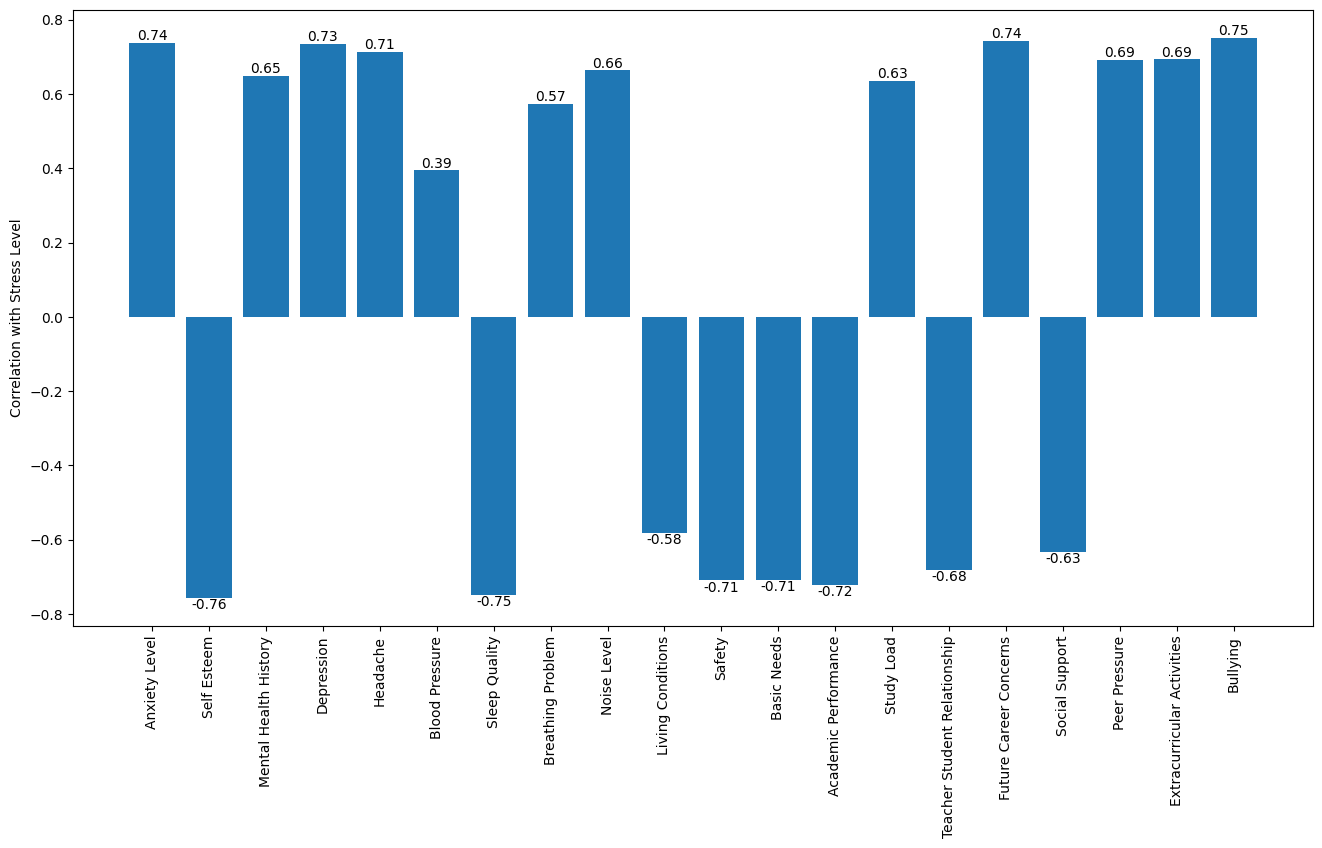

In [28]:
corr = df.corr()["Stress Level"].drop("Stress Level")

plt.figure(figsize=(16,8))
corr = df.corr()["Stress Level"].drop("Stress Level")

plt.bar(corr.index, corr.values)
plt.xticks(rotation=90)

for i, v in enumerate(corr.values):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom' if v>=0 else 'top')

plt.ylabel("Correlation with Stress Level")
plt.show()

## Stress Level: Correlation Insights

- **Highly Positive Correlations:**
  - Stress Level has a strong positive correlation with:
    - **Anxiety Level (0.74)**
    - **Depression (0.73)**
    - **Bullying (0.75)**
    - **Future Career Concerns (0.74)**
    - **Peer Pressure (0.69)**
    - **Extracurricular Activities (0.69)**
    - **Headache (0.71)**
    - **Noise Level (0.66)**
    - **Mental Health History (0.65)**
    - **Study Load (0.63)**
    - **Academic Performance (-0.72)** (negative direction)

- **Highly Negative Correlations:**
  - Stress Level is strongly negatively correlated with:
    - **Self Esteem (-0.76)**
    - **Sleep Quality (-0.75)**
    - **Safety (-0.71)**
    - **Basic Needs (-0.71)**

- **Interpretation:**
  - Higher stress levels are closely tied to higher anxiety, depression, bullying, and concerns about the future.
  - As stress increases, self-esteem and sleep quality tend to decrease sharply, reflecting a potential area for interventions focused on building self-esteem and improving sleep routines.


In [29]:
X = df.drop(columns=["Stress Level"])
X_const = add_constant(X)


vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]


vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)


                         feature       VIF
1                  Anxiety Level  3.226378
2                    Self Esteem  3.208365
3          Mental Health History  2.218410
4                     Depression  3.090505
5                       Headache  2.534846
6                 Blood Pressure  3.686664
7                  Sleep Quality  3.089081
8              Breathing Problem  1.784443
9                    Noise Level  1.990095
10             Living Conditions  1.797776
11                        Safety  2.790136
12                   Basic Needs  2.679847
13          Academic Performance  2.706926
14                    Study Load  1.900661
15  Teacher Student Relationship  3.198274
16        Future Career Concerns  3.416580
17                Social Support  5.745766
18                 Peer Pressure  2.606810
19    Extracurricular Activities  2.516038
20                      Bullying  3.187411


### Observations

- **All VIF values are below 10**, indicating that severe multicollinearity is not present in this dataset.
- **Social Support** has the highest VIF (5.75), suggesting moderate correlation with other predictors, but it is still within acceptable limits for regression modeling.
- Most features have VIF values between **1.7 and 3.7**, indicating low to moderate multicollinearity and suggesting all features can generally be retained for further analysis.

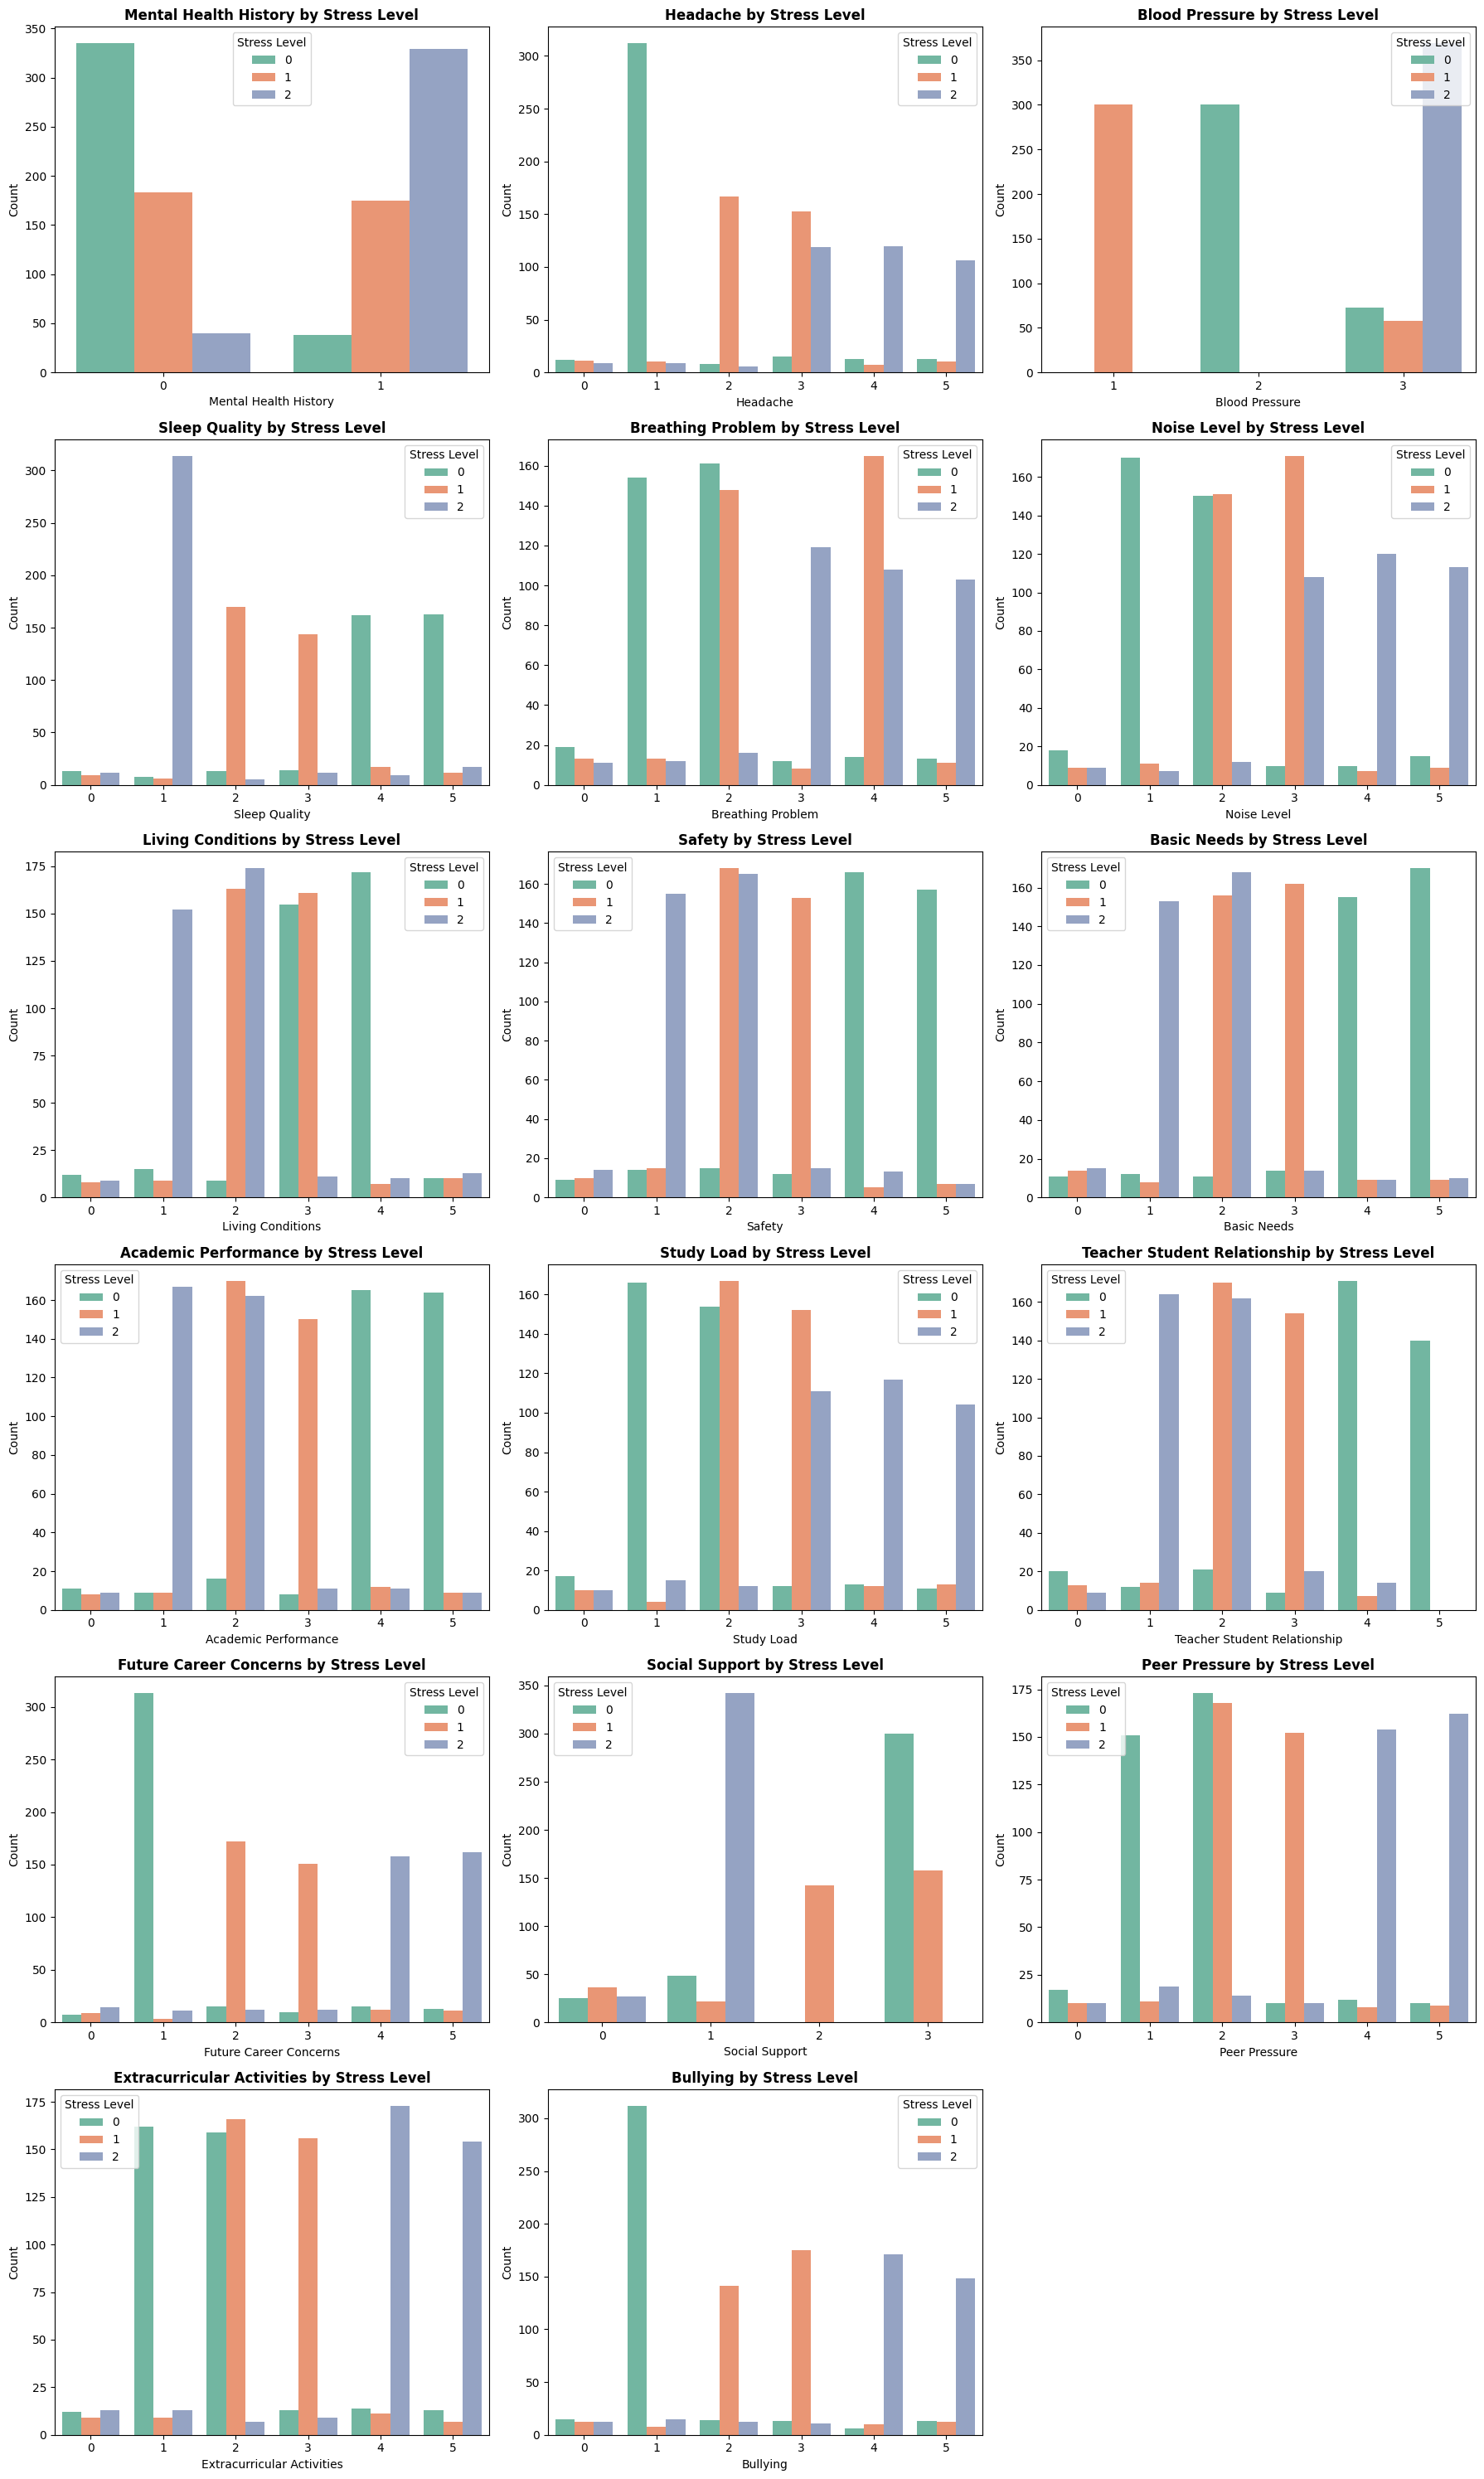

In [34]:
exclude_cols = ["Anxiety Level", "Self Esteem", "Depression"]


cols_to_plot = df.drop(columns=exclude_cols + ["Stress Level"]).columns


n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 5))
palette = sns.color_palette("Set2")

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, hue="Stress Level", data=df, palette=palette)
    plt.title(f"{col} by Stress Level", fontsize=12, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Stress Level")

plt.tight_layout()
plt.show()

## Stress Level and Influencing Factors: Visual Insights

- **Clear Group Differences:** Many bar charts reveal that higher stress levels (especially Stress Level 2) are associated with higher counts for negative attributes such as prior mental health history, frequent headaches, higher blood pressure, more breathing problems, exposure to noise, and bullying.
- **Protective Factors:** Lower stress levels (Stress Level 0) are more prevalent among those with better sleep quality, adequate safety, fulfillment of basic needs, better academic performance, healthy teacher-student relationships, strong social support, and fewer future career concerns or bullying experiences.
- **Socio-academic Stressors:** Higher stress groups also coincide with greater study loads, more future career concerns, and increased peer pressure, emphasizing the role of both academic and social factors.
- **Multidimensional Impact:** The charts provide strong evidence that stress levels are shaped by a combination of physical, psychological, social, and academic variables, with higher stress consistently clustering with more adverse circumstances across these features.


# Model Building

In [36]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["Stress Level"],axis=1),df["Stress Level"],test_size=0.25,random_state=42)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((825, 20), (275, 20), (825,), (275,))

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [48]:
model=LogisticRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Test Accuracy : ",test_acc)
print("Train Accuracy : ",train_acc)



print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

cm=confusion_matrix(y_test, y_test_pred)


Test Accuracy :  0.8945454545454545
Train Accuracy :  0.9054545454545454

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        95
           1       0.88      0.89      0.89        92
           2       0.90      0.92      0.91        88

    accuracy                           0.89       275
   macro avg       0.89      0.90      0.89       275
weighted avg       0.89      0.89      0.89       275



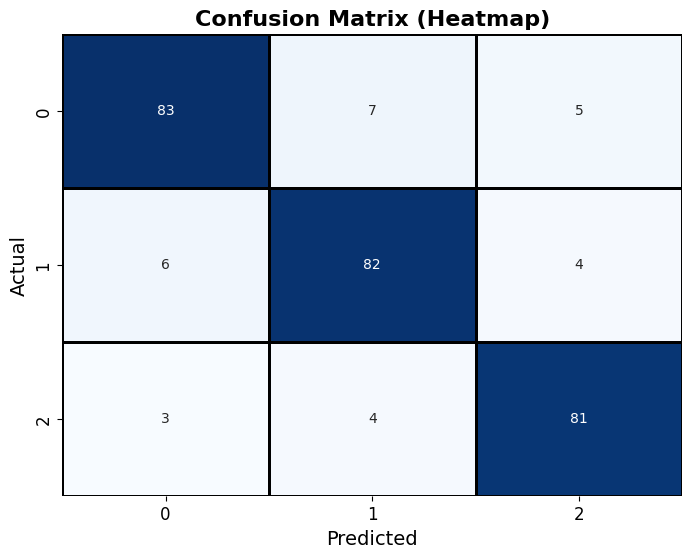

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_,
            cbar=False, linewidths=2, linecolor='black')

plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix (Heatmap)", fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Model Performance: Complete Explanation



### 1. Accuracy

- **Train Accuracy:** 0.91 (91%)
- **Test Accuracy:** 0.89 (89%)
- **Meaning:** Accuracy is the proportion of total correct predictions made by the model out of all predictions. In this case, the model correctly classifies about 89% of unseen data, and about 91% of training data, indicating strong generalization and minimal overfitting.
- **Formula:**  
  \[
  \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
  \]
- **Interpretation:** The small gap between train and test accuracy suggests the model is not overfitting and learns the data patterns well[web:4][web:8].

---

### 2. Precision, Recall, and F1-Score

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
|   0   |   0.90    |  0.87  |   0.89   |   95    |
|   1   |   0.88    |  0.89  |   0.89   |   92    |
|   2   |   0.90    |  0.92  |   0.91   |   88    |

- **Precision:** Measures how many predicted positives are actual positives. High precision means few false positives.
    - Formula: \( \text{Precision} = \frac{TP}{TP + FP} \)
- **Recall (Sensitivity):** Measures how many actual positives were correctly predicted. High recall means few false negatives.
    - Formula: \( \text{Recall} = \frac{TP}{TP + FN} \)
- **F1-score:** Harmonic mean of precision and recall. F1 balances both, especially valuable when classes are uneven or both false positives and negatives matter.
    - Formula: \( \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)
- **Support:** Number of instances for each class in the true data.

#### Macro Average
- Takes a simple mean across all classes, treating each class equally regardless of support.
    
#### Weighted Average
- Averages weighted by class frequency, reflecting the actual class distribution[web:4][web:10].

---

### 3. Confusion Matrix

A confusion matrix shows how many samples from each true class got predicted into each predicted class.

|        | Predicted 0 | Predicted 1 | Predicted 2 |
|--------|-------------|-------------|-------------|
| True 0 |     83      |      7      |      5      |
| True 1 |      6      |     82      |      4      |
| True 2 |      3      |      4      |     81      |

- **Interpretation:**  
  - The diagonal cells (83, 82, 81) represent correct predictions for each class.
  - Off-diagonal values are misclassifications (for example, 7 samples from class 0 were predicted as class 1).
  - Most predictions are correct; misclassifications are relatively few and have no systematic pattern, indicating balanced class performance.

---

### 4. What Do These Numbers Mean?

- **High precision, recall, and F1 for all classes** show the model is able to correctly identify, recall, and balance errors for each stress level.
- **Balanced scores** across all classes confirm the model does not favor any single class and handles the classification task robustly.
- **Close test/train accuracy** (0.89 vs 0.91) means the model generalizes well. A large gap typically indicates overfitting, but that's not the case here.
- **Supports (samples per class):** All classes are represented, so there's no class imbalance problem.

---

### 5. Final Summary

- The model is highly accurate, with strong performance across all metrics for each class.
- Both types of errors (false positives and false negatives) are minimized thanks to high and balanced precision and recall.
- The confusion matrix confirms very few mistakes.
- These results indicate the model is **well-suited for predicting stress levels in new/unseen data** and can be confidently considered reliable for deployment or further analysis..
